# Project description

Ice is the online store, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 
To spot potential big winners and plan advertising campaigns we need: to identify patterns that determine whether a game succeeds or not. 

## Initialization

In [1]:
import pandas as pd# Loading all the libraries
from scipy import stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Loading data

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [4]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## Prepare the data

We need:
- to replace names of the columns to lowercase
- find and remove or complite missing values and duplicates
- to convert the data to the required types

### Rename data

In [5]:
df.columns=df.columns.map(lambda x: x.lower())#to replace names of the columns to lowercase

In [6]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Let's replace the game rating values with numerical ones in accordance with the largest number of users who are allowed to play these games.

In [7]:
dict_rating={'E':1,'K-A':1,'EC':1,'M':4,'T':3,'E10+':2,'AO':5,'RP':'unknown'}

In [8]:
df['rating']=df['rating'].map(dict_rating)

In [9]:
df['rating'].unique()

array([1, nan, 4, 3, 2, 5, 'unknown'], dtype=object)

### Adding data

In [10]:
df['all_sales']=df.apply(lambda row: (row['na_sales']+row['eu_sales']+row['jp_sales']+row['other_sales']),axis=1)

In [11]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,1,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,1,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,1,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,1,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,1,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,1,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Checking missing values

In [12]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
all_sales             0
dtype: int64

In [13]:
for column in df.columns:
    if df[column].isna().sum()!=0:
        print('percente missing data in',column, round(df[column].isna().sum()/df.shape[0]*100,2),'%')

percente missing data in name 0.01 %
percente missing data in year_of_release 1.61 %
percente missing data in genre 0.01 %
percente missing data in critic_score 51.32 %
percente missing data in user_score 40.09 %
percente missing data in rating 40.48 %


We can remove missing values in 'name' because there are few of them and it won't affect our analysis. Others missing values we can't remove, because it is big part ot our data.

In [14]:
df.dropna(inplace=True,subset=['name'])#remove missing values

In [15]:
len(df['name'].unique())

11559

Let's fill missing values in year_of_release, rating, critic_score, user_score according to game's name. 	

#### Filling missing values in year_of_release

In [16]:
df['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [17]:
df[df['year_of_release'].isna()==True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,1,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,1,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,2,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,2,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,3,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,4,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [18]:
df_no_missing_year=df.dropna(inplace=False,subset=['year_of_release'])

In [19]:
df_no_missing_year.groupby(['name'])['year_of_release'].count()

name
 Beyblade Burst                 1
 Fire Emblem Fates              1
 Frozen: Olaf's Quest           2
 Haikyu!! Cross Team Match!     1
 Tales of Xillia 2              1
                               ..
thinkSMART FAMILY!              1
thinkSMART: Chess for Kids      1
uDraw Studio                    1
uDraw Studio: Instant Artist    2
¡Shin Chan Flipa en colores!    1
Name: year_of_release, Length: 11426, dtype: int64

In [20]:
dict_year=df_no_missing_year.groupby(['name'])['year_of_release'].min().to_dict()

In [21]:
dict_year

{' Beyblade Burst': 2016.0,
 ' Fire Emblem Fates': 2015.0,
 " Frozen: Olaf's Quest": 2013.0,
 ' Haikyu!! Cross Team Match!': 2016.0,
 ' Tales of Xillia 2': 2012.0,
 "'98 Koshien": 1998.0,
 '.hack//G.U. Vol.1//Rebirth': 2006.0,
 '.hack//G.U. Vol.2//Reminisce': 2006.0,
 '.hack//G.U. Vol.2//Reminisce (jp sales)': 2006.0,
 '.hack//G.U. Vol.3//Redemption': 2007.0,
 '.hack//Infection Part 1': 2002.0,
 '.hack//Link': 2010.0,
 '.hack//Mutation Part 2': 2002.0,
 '.hack//Outbreak Part 3': 2002.0,
 '.hack//Quarantine Part 4: The Final Chapter': 2003.0,
 '.hack: Sekai no Mukou ni + Versus': 2012.0,
 '007 Racing': 2000.0,
 '007: Quantum of Solace': 2008.0,
 '007: The World is not Enough': 2000.0,
 '007: Tomorrow Never Dies': 1999.0,
 '1 vs. 100': 2008.0,
 '1/2 Summer +': 2013.0,
 '10 Minute Solution': 2010.0,
 '100 All-Time Favorites': 2009.0,
 '100 Classic Books': 2008.0,
 '100 Classic Games': 2011.0,
 '1000 Cooking Recipes from ELLE à table': 2010.0,
 '1001 Touch Games': 2011.0,
 '101-in-1 Explos

In [22]:
df['year_of_release']=df['year_of_release'].fillna(df.name.map(dict_year))

In [23]:
len(df[df['year_of_release'].isna()]['name'].unique())

133

In [24]:
df.loc[(df.name=='wwe Smackdown vs. Raw 2006')&(df.year_of_release.isna()),'year_of_release']=2006
df.loc[(df.name=='All-Star Baseball 2005')&(df.year_of_release.isna()),'year_of_release']=2005

In [25]:
df['year_of_release'].isna().sum()

143

#### Filling missing values in rating

In [26]:
df['rating'].unique()

array([1, nan, 4, 3, 2, 5, 'unknown'], dtype=object)

In [27]:
df_no_missing_rating=df[df['rating']!='unknown'].dropna(inplace=False,subset=['rating'])

In [28]:
dict_rating=df_no_missing_rating.groupby(['name'])['rating'].min().to_dict()
df['rating']=df['rating'].fillna(df.name.map(dict_rating))

In [29]:
df['rating'].isna().sum()

6327

#### Filling missing values in critic_score

In [30]:
df_no_missing_critic_score=df.dropna(inplace=False,subset=['critic_score'])

In [31]:
dict_critic_score=df_no_missing_critic_score.groupby('name')['critic_score'].median()

In [32]:
dict_critic_score

name
 Tales of Xillia 2              71.0
.hack//Infection Part 1         75.0
.hack//Mutation Part 2          76.0
.hack//Outbreak Part 3          70.0
007 Racing                      51.0
                                ... 
inFAMOUS: Second Son            80.0
nail'd                          65.0
pro evolution soccer 2011       78.0
uDraw Studio                    71.0
uDraw Studio: Instant Artist    54.0
Name: critic_score, Length: 5085, dtype: float64

In [33]:
dict_critic_score=df_no_missing_critic_score.groupby('name')['critic_score'].median().to_dict()

In [34]:
dict_critic_score=df_no_missing_critic_score.groupby('name')['critic_score'].median()

In [35]:
dict_critic_score

name
 Tales of Xillia 2              71.0
.hack//Infection Part 1         75.0
.hack//Mutation Part 2          76.0
.hack//Outbreak Part 3          70.0
007 Racing                      51.0
                                ... 
inFAMOUS: Second Son            80.0
nail'd                          65.0
pro evolution soccer 2011       78.0
uDraw Studio                    71.0
uDraw Studio: Instant Artist    54.0
Name: critic_score, Length: 5085, dtype: float64

In [36]:
df_no_missing_critic_score=df.dropna(inplace=False,subset=['critic_score'])
dict_critic_score=df_no_missing_critic_score.groupby('name')['critic_score'].median().to_dict()
df['critic_score']=df['critic_score'].fillna(df.name.map(dict_critic_score))

In [37]:
df['critic_score'].isna().sum()

7615

#### Filling missing values in user_score

In [38]:
df_no_missing_user_score=df.loc[df['user_score']!='tbd'].dropna(inplace=False,subset=['user_score'])

In [39]:
df_no_missing_user_score['user_score']=pd.to_numeric(df_no_missing_user_score['user_score'])

In [40]:
df_no_missing_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7590 entries, 0 to 16705
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             7590 non-null   object 
 1   platform         7590 non-null   object 
 2   year_of_release  7542 non-null   float64
 3   genre            7590 non-null   object 
 4   na_sales         7590 non-null   float64
 5   eu_sales         7590 non-null   float64
 6   jp_sales         7590 non-null   float64
 7   other_sales      7590 non-null   float64
 8   critic_score     7354 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           7533 non-null   object 
 11  all_sales        7590 non-null   float64
dtypes: float64(8), object(4)
memory usage: 770.9+ KB


In [41]:
dict_user_score=df_no_missing_user_score.groupby(['name'])['user_score'].median().to_dict()
df['user_score']=df['user_score'].fillna(df.name.map(dict_user_score))

In [42]:
df['user_score']

0          8
1        NaN
2        8.3
3          8
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16713, dtype: object

In [43]:
df['user_score'].isna().sum()

6348

#### Results of filling missing values

Let's look at the result of filling missing values

In [44]:
df.isna().sum()

name                  0
platform              0
year_of_release     143
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7615
user_score         6348
rating             6327
all_sales             0
dtype: int64

In [45]:
for column in df.columns:
    if df[column].isna().sum()!=0:
        print('percente missing data in',column, round(df[column].isna().sum()/df.shape[0]*100,2),'%')

percente missing data in year_of_release 0.86 %
percente missing data in critic_score 45.56 %
percente missing data in user_score 37.98 %
percente missing data in rating 37.86 %


Now we can remove missing data in year_of_release, because it is less than 1%, other missing data is staying in DataFrame.

In [46]:
df.dropna(subset=['year_of_release'], inplace=True)

In [47]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7533
user_score         6283
rating             6263
all_sales             0
dtype: int64

Possible that there are missing values in user, critic score and rating, because of low popular of there games and there is not enough review on that games. Let's check sales of there games.

In [48]:
df_missing_values=df[(df['critic_score'].isna()==True)][(df['user_score'].isna()==True)][(df['rating'].isna()==True)]#checking is it the same games with missing values in user, critic score and rating
df_missing_values

/tmp/ipykernel_150/2389544971.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_missing_values=df[(df['critic_score'].isna()==True)][(df['user_score'].isna()==True)][(df['rating'].isna()==True)]#checking is it the same games with missing values in user, critic score and rating
/tmp/ipykernel_150/2389544971.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_missing_values=df[(df['critic_score'].isna()==True)][(df['user_score'].isna()==True)][(df['rating'].isna()==True)]#checking is it the same games with missing values in user, critic score and rating


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


The most games with missing data in that columns - the same.

In [49]:
df_missing_values['all_sales'].describe()

count    6158.000000
mean        0.420372
std         1.400355
min         0.000000
25%         0.040000
50%         0.110000
75%         0.320000
max        40.240000
Name: all_sales, dtype: float64

In [50]:
np.percentile(df_missing_values['all_sales'],90)

0.9

Really we see, that the most games with missing values in scores and rating have very low sales. 90% of it have sales less 1 millions $. Perhaps we will remove them, how outlers. Now let's replace them on 0

In [51]:
df=df.fillna(0)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16570 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16570 non-null  object 
 1   platform         16570 non-null  object 
 2   year_of_release  16570 non-null  float64
 3   genre            16570 non-null  object 
 4   na_sales         16570 non-null  float64
 5   eu_sales         16570 non-null  float64
 6   jp_sales         16570 non-null  float64
 7   other_sales      16570 non-null  float64
 8   critic_score     16570 non-null  float64
 9   user_score       16570 non-null  object 
 10  rating           16570 non-null  object 
 11  all_sales        16570 non-null  float64
dtypes: float64(7), object(5)
memory usage: 2.1+ MB


### Cheking duplicates

In [53]:
df.duplicated().sum()

0

### Changing data types

In [54]:
df['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', 8.9,
       '4.3', '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4',
       '6.8', '6.1', '6.7', '5.4', 8.3, '4', 9.1, 4.1, '4.9', '4.5',
       '9.3', '6.2', '4.2', 8.55, '6', '3.7', 8.2, '4.1', '5.8', '5.6',
       8.0, '5.5', '4.4', '4.6', '5.9', '3.9', 8.5, 4.15, 8.6, '3.1',
       6.95, '2.9', 7.1, 7.8, '5.2', 9.2, 6.25, 5.2, 7.75, '3.3', 2.2,
       '4.7', 5.9, 6.4, 7.7, '5.1', 7.050000000000001, 8.8, '3.5', 7.55,
       '2.5', '1.9', 7.6, '3', 6.7, '2.7', '2.2', 7.5, 8.1, '2', 7.4, 6.9,
       9.0, '9.5', 3.3, '2.1', 7.3, 7.0, '3.6', 9.7, 5.5, '2.8', 7.65,
       8.649999999999999, 7.9, 6.8, '1.8', 5.949999999999999, 8.35, '3.8',
       6.3, 6.6, 8.25, '0', 3.4, '1.6', 6.5, 8.4, 8.7, 7.25, '9.6', 8.85,
       5.1, 7.8500000000000005, 6.2, '2.4', 8.95, 6.85, 

In [55]:
df['user_score']=pd.to_numeric(df[(df['user_score'].notna())&(df['user_score']!='tbd')]['user_score'])

In [56]:
df['user_score'].unique()

array([8.  , 0.  , 8.3 , 8.5 , 6.6 , 8.4 , 8.6 , 7.7 , 6.3 , 7.4 , 8.2 ,
       9.  , 7.9 , 8.1 , 8.7 , 7.1 , 3.4 , 5.3 , 4.8 , 3.2 , 8.9 , 6.4 ,
       7.8 , 7.5 , 2.6 , 7.2 , 9.2 , 7.  , 7.3 , 4.3 , 7.6 , 5.7 , 5.  ,
       9.1 , 6.5 ,  nan, 8.8 , 6.9 , 9.4 , 6.8 , 6.1 , 6.7 , 5.4 , 4.  ,
       4.1 , 4.9 , 4.5 , 9.3 , 6.2 , 4.2 , 8.55, 6.  , 3.7 , 5.8 , 5.6 ,
       5.5 , 4.4 , 4.6 , 5.9 , 3.9 , 4.15, 3.1 , 6.95, 2.9 , 5.2 , 6.25,
       7.75, 3.3 , 2.2 , 4.7 , 5.1 , 7.05, 3.5 , 7.55, 2.5 , 1.9 , 3.  ,
       2.7 , 2.  , 9.5 , 2.1 , 3.6 , 9.7 , 2.8 , 7.65, 8.65, 1.8 , 5.95,
       8.35, 3.8 , 8.25, 1.6 , 7.25, 9.6 , 8.85, 7.85, 2.4 , 8.95, 6.85,
       1.7 , 5.45, 1.1 , 7.8 , 0.3 , 5.2 , 5.35, 6.15, 1.5 , 7.85, 0.7 ,
       1.2 , 6.75, 2.3 , 9.1 , 0.5 , 1.3 , 0.2 , 7.2 , 0.6 , 6.7 , 1.4 ,
       0.9 , 1.  , 6.35, 7.3 , 4.8 , 3.95, 7.15, 8.05, 3.25, 8.75, 5.75,
       5.05, 8.1 ])

In [57]:
df['critic_score']=pd.to_numeric(df[(df['critic_score'].notna())&(df['critic_score']!='tbd')]['critic_score'])

In [58]:
df['critic_score'].unique()

array([76. ,  0. , 82. , 80. , 89. , 58. , 87. , 91. , 61. , 97. , 95. ,
       77. , 88. , 83. , 94. , 93. , 85. , 86. , 98. , 96. , 90. , 84. ,
       73. , 74. , 78. , 92. , 71. , 72. , 68. , 62. , 49. , 42. , 67. ,
       81. , 66. , 56. , 43. , 79. , 70. , 59. , 64. , 75. , 60. , 63. ,
       62.5, 69. , 50. , 25. , 44. , 55. , 80.5, 48. , 75.5, 57. , 29. ,
       74.5, 47. , 65. , 77.5, 54. , 20. , 61.5, 53. , 37. , 52. , 82.5,
       38. , 33. , 30. , 32. , 53.5, 45. , 51. , 68.5, 40. , 46. , 83.5,
       86.5, 85.5, 39. , 73.5, 70.5, 34. , 96.5, 57.5, 59.5, 65.5, 90.5,
       69.5, 35. , 81.5, 41. , 54.5, 92.5, 88.5, 72.5, 36. , 78.5, 89.5,
       44.5, 60.5, 40.5, 28. , 87.5, 31. , 27. , 26. , 67.5, 19. , 71.5,
       66.5, 23. , 39.5, 91.5, 31.5, 42.5, 24. , 21. , 35.5, 49.5, 52.5,
       17. , 79.5, 19.5, 48.5, 28.5, 63.5, 58.5, 56.5, 50.5, 13. , 64.5,
       76.5])

In [59]:
df['rating'].unique()

array([1, 0, 4, 3, 2, 5, 'unknown'], dtype=object)

## Analyze the data

### Let's look at how many games were released in different years. 

In [60]:
df_years=df.pivot_table(index='year_of_release', values='name', aggfunc='count')
df_years

,name
year_of_release,
1980.0,9
1981.0,46
1982.0,36
1983.0,17
1984.0,14
1985.0,14
1986.0,21
1987.0,16
1988.0,15


In [61]:
df_years.describe()

,name
count,37.000000
mean,447.837838
std,455.802986
min,9.000000
25%,36.000000
50%,339.000000
75%,764.000000
max,1441.000000


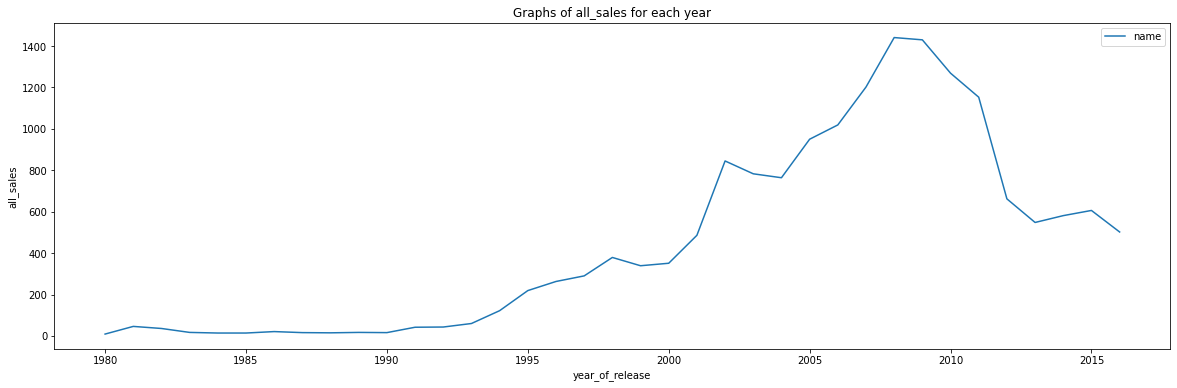

In [62]:
df_years.plot(figsize=(20, 6))
plt.title('Graphs of all_sales for each year'),
plt.ylabel('all_sales')
plt.show()

We can see, that in the begining number of sales growing up with years, it is happened simple because of developing games industry in that years, and is not touch with games types and platforms. So we will not consider salles in years to 1998 for the planinig of sales on 2017 year.

In [63]:
df=df.query('year_of_release>1998')

### Let's look how sales varied from platform to platform.

In [64]:
df_platform=df.pivot_table(index='platform', values='all_sales',aggfunc='sum')
df_platform.sort_values(by='all_sales')

,all_sales
platform,
SAT,0.09
SNES,0.26
WS,1.42
DC,12.57
PSV,53.81
GB,67.00
WiiU,82.19
N64,95.64
XOne,159.32


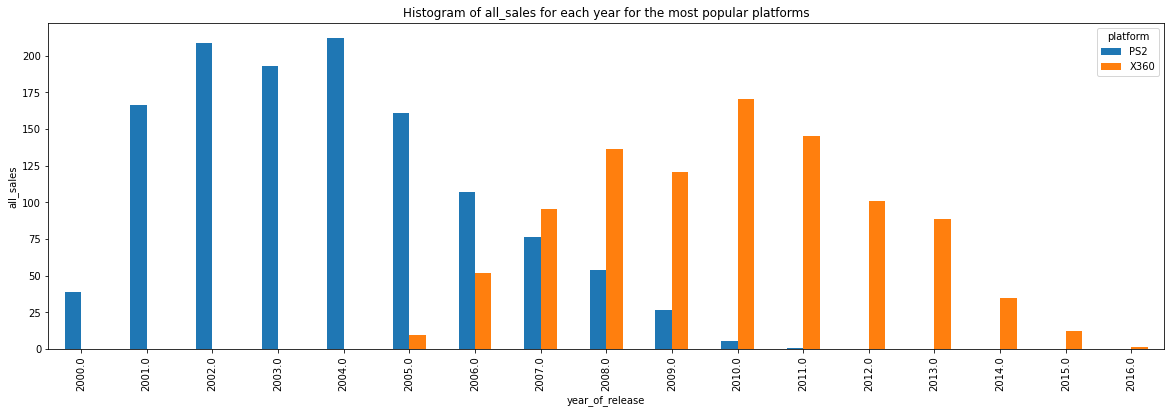

In [65]:
df.query('(platform=="X360")or(platform=="PS2")').pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').sort_index().plot(kind='bar',figsize=(20, 6))
plt.title('Histogram of all_sales for each year for the most popular platforms'),
plt.ylabel('all_sales')
plt.show() 

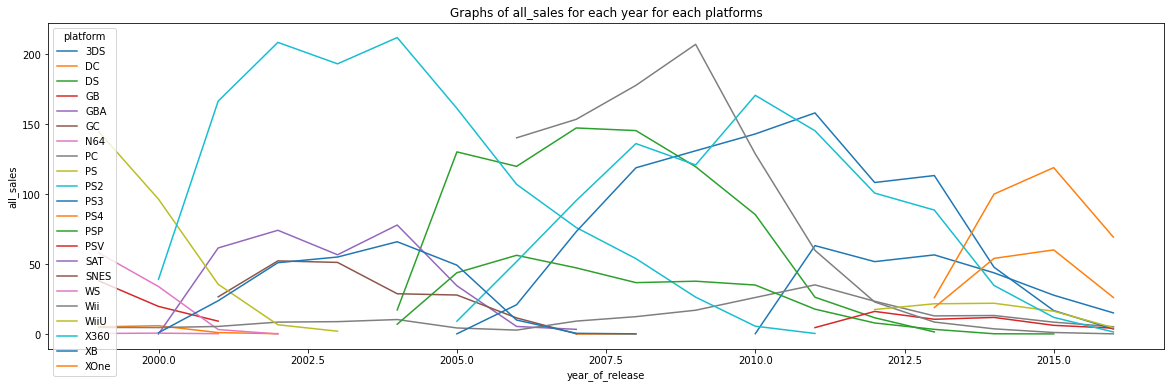

In [66]:
df.pivot_table(index='year_of_release',columns='platform',values='all_sales',aggfunc='sum').sort_index().plot(figsize=(20, 6))
plt.title('Graphs of all_sales for each year for each platforms'),
plt.ylabel('all_sales')
plt.show()

### Let's find platforms, which were popular, but now don't have sales.

In [67]:
df1=df.groupby(['platform'])['year_of_release'].agg(['min','max']).reset_index()
df1

,platform,min,max
0,3DS,2000.0,2016.0
1,DC,1999.0,2008.0
2,DS,2004.0,2013.0
3,GB,1999.0,2001.0
4,GBA,2000.0,2007.0
5,GC,2001.0,2007.0
6,N64,1999.0,2004.0
7,PC,1999.0,2016.0
8,PS,1999.0,2003.0
9,PS2,2000.0,2011.0


In [68]:
df1['age']=df1.apply(lambda row:row['max']-row['min'],axis=1)

In [69]:
print('Average "life" for platform:', df1['age'].median())

Average "life" for platform: 6.5


In [70]:
df1=df1.reset_index()
df1.sort_values(by='min')

,index,platform,min,max,age
1,1,DC,1999.0,2008.0,9.0
3,3,GB,1999.0,2001.0,2.0
6,6,N64,1999.0,2004.0,5.0
7,7,PC,1999.0,2016.0,17.0
8,8,PS,1999.0,2003.0,4.0
16,16,WS,1999.0,2001.0,2.0
14,14,SAT,1999.0,1999.0,0.0
15,15,SNES,1999.0,1999.0,0.0
0,0,3DS,2000.0,2016.0,16.0
4,4,GBA,2000.0,2007.0,7.0


Since the average life expectancy of platforms is 6.5 years, it is logical to consider a period of no more than this period for the sales forecast for 2017.

In [71]:
df=df[df.year_of_release>=2011]

In [72]:
df_platform=df.groupby(['platform','year_of_release'])['all_sales'].sum().reset_index().sort_values(by='year_of_release')
df_platform

,platform,year_of_release,all_sales
0,3DS,2011.0,63.20
31,PSV,2011.0,4.63
16,PS3,2011.0,157.98
15,PS2,2011.0,0.45
37,Wii,2011.0,59.79
9,PC,2011.0,35.16
26,PSP,2011.0,17.82
48,X360,2011.0,145.23
6,DS,2011.0,26.33
7,DS,2012.0,11.67


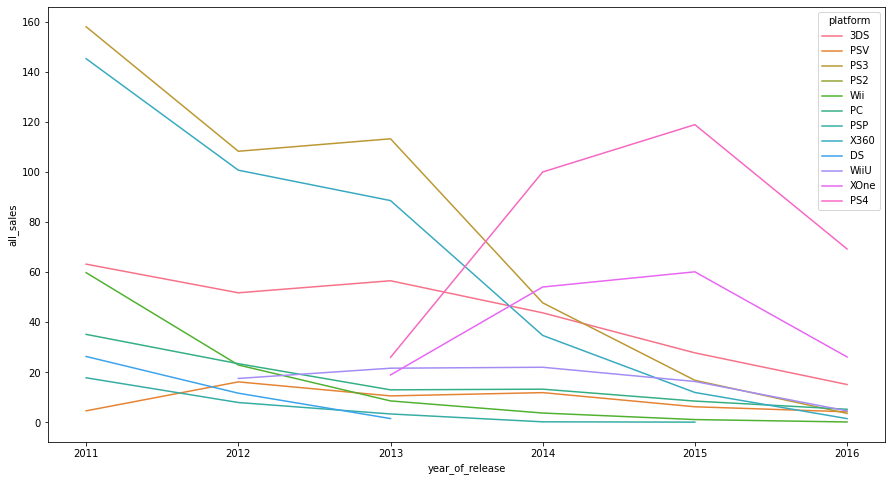

In [73]:
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_platform, x="year_of_release", y="all_sales",hue="platform")


We see that PS2 and DS platforms, popular in the past, now have no sales.

### Let's select several potentially profitable platforms.

In [74]:
df_platform.query('year_of_release==2016').pivot_table(index='platform',values='all_sales').sort_values(by='all_sales')

,all_sales
platform,
Wii,0.18
X360,1.52
PS3,3.60
PSV,4.25
WiiU,4.60
PC,5.25
3DS,15.14
XOne,26.15
PS4,69.25


Platforms with a large number of sales in the last year PS4 and XOne. Although in relation to previous years, their sales are falling.
Even though the 3DS platform had lower sales in 2016, the drop in sales in previous years is not as big as in PS4 and XOne. And we can assume that next year the drop in sales on the 3DS platform will not be as big as on.

### Let's build a box plot for the global sales of all games, broken down by platform.

In [75]:
grouped=df.groupby(['platform','name'])['all_sales'].sum().reset_index()
grouped

,platform,name,all_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07
...,...,...,...
4046,XOne,XCOM 2,0.04
4047,XOne,ZombiU,0.01
4048,XOne,Zombie Army Trilogy,0.11
4049,XOne,Zoo Tycoon (2013),0.36


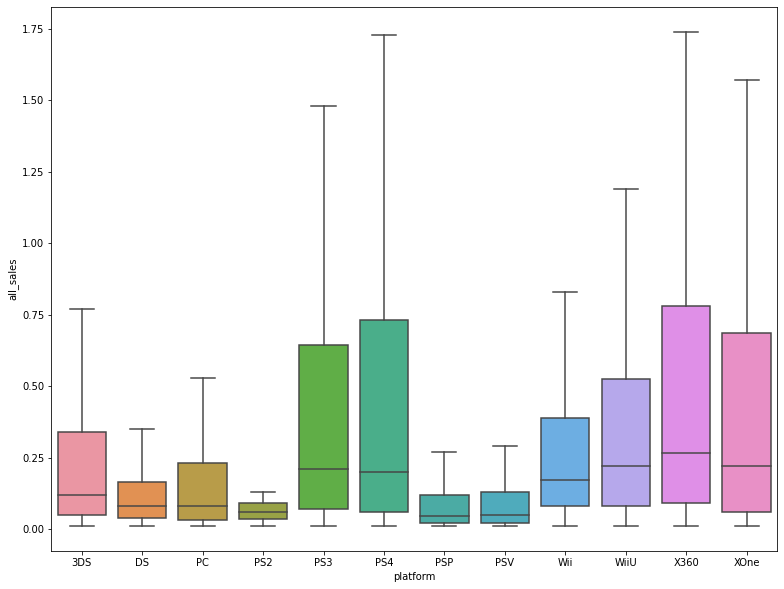

In [76]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='all_sales',data=grouped,showfliers = False)
plt.show()

In [77]:
order=grouped.groupby(['platform'])['all_sales'].sum().reset_index().sort_values(by='all_sales')['platform']
order

3      PS2
6      PSP
1       DS
7      PSV
9     WiiU
8      Wii
2       PC
11    XOne
0      3DS
5      PS4
10    X360
4      PS3
Name: platform, dtype: object

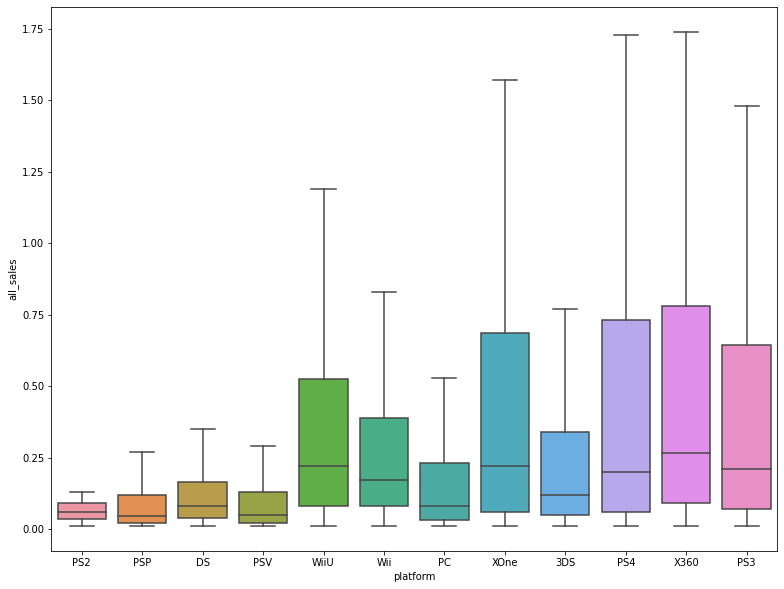

In [78]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='all_sales',data=grouped,order=order,showfliers = False)
plt.show()

According to the boxplot, we see that the highest average game sales on the platforms X360 and PS4.

### Let's look at how user and professional reviews affect sales for one popular platform X360

In [79]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,4,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,4,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,4,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


In [80]:
df_X360=df[(df.platform=='X360')&(df['user_score'].notna())][['all_sales','user_score']]

In [81]:
df_X360

,all_sales,user_score
23,16.27,8.10
29,14.73,3.40
35,13.68,4.80
60,10.24,2.60
66,9.71,7.00
...,...,...
16491,0.01,5.05
16540,0.01,0.00
16576,0.01,0.00
16613,0.01,2.10


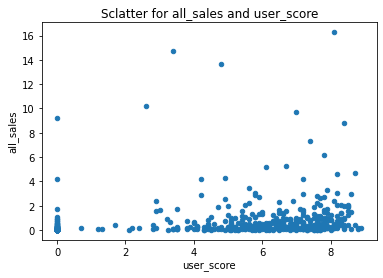

In [82]:
df_X360.plot(x='user_score', y='all_sales', kind='scatter') 
plt.title('Sclatter for all_sales and user_score'),
plt.ylabel('all_sales')
plt.show()

In [83]:
correlation=df_X360['all_sales'].corr(df_X360['user_score'])

In [84]:
df_X360.corr()

,all_sales,user_score
all_sales,1.000000,0.137025
user_score,0.137025,1.000000


In [85]:
if correlation>0.7:
    result='positive between this score and sales'
else: result='score and sales independence'
print(result)

score and sales independence


Since the correlation coefficient is small, we can say that sales and user score practically do not depend on each other. But since it is positive, the minimum dependence is direct.

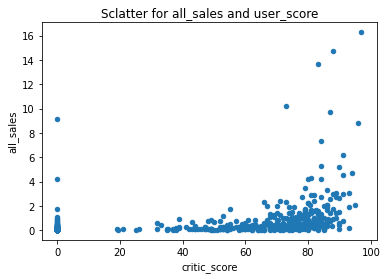

score and sales independence


In [86]:
df_X360=df[(df.platform=='X360')&(df['critic_score'].notna())][['all_sales','critic_score']]
df_X360.plot(x='critic_score', y='all_sales', kind='scatter') 
plt.title('Sclatter for all_sales and user_score'),
plt.ylabel('all_sales')
plt.show()
correlation=df_X360['all_sales'].corr(df_X360['critic_score'])
df_X360.corr()
if correlation>0.7:
    result='positive between this score and sales'
else: result='score and sales independence'
print(result)

Since the correlation coefficient is small, we can say that sales and critic score also practically do not depend on each other.

### Let's compare the sales of the same games on other platforms.

In [87]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,4,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,4,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,4,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


In [88]:
def score_effect(platform,score_type):
        df_f=df[(df.platform==platform)&(df[score_type].notna())][['all_sales',score_type]]
        df_f.plot(x=score_type, y='all_sales', kind='scatter') 
        plt.title('Sclatter for all_sales and score'),
        plt.ylabel(platform)
        plt.show()
        correlation=df_f['all_sales'].corr(df_f[score_type])
        if correlation>0.7:
            result='positive between this score and sales'
        else: result='score and sales independence'
        print(correlation,result)

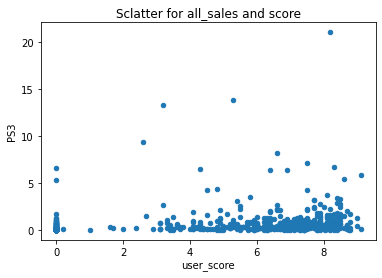

0.20954557982089433 score and sales independence


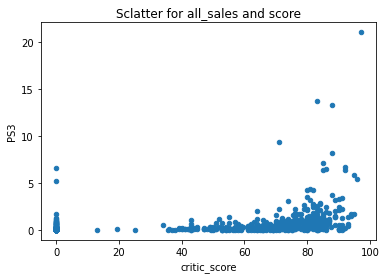

0.3120551344322737 score and sales independence


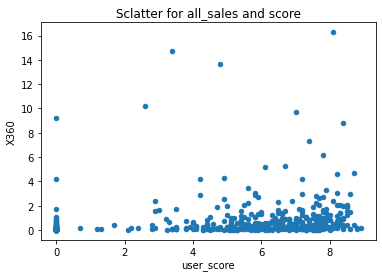

0.13702532088697375 score and sales independence


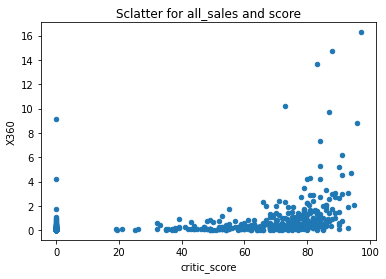

0.3017312564361826 score and sales independence


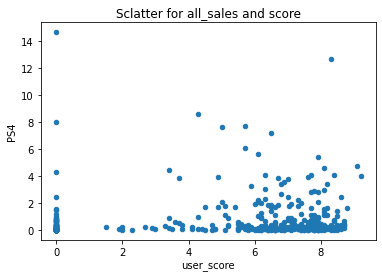

0.09233870754678249 score and sales independence


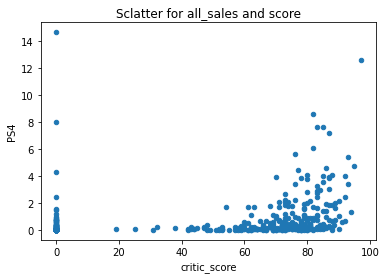

0.22162550680874035 score and sales independence


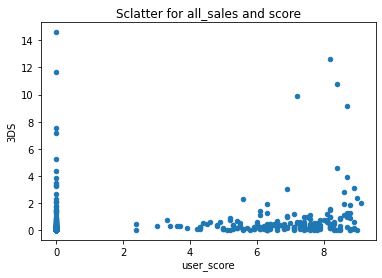

0.13086083484605712 score and sales independence


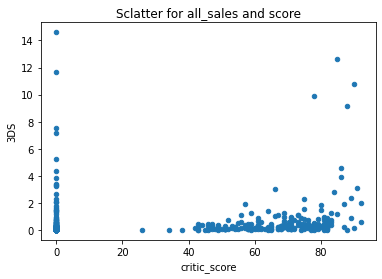

0.15429319863403196 score and sales independence


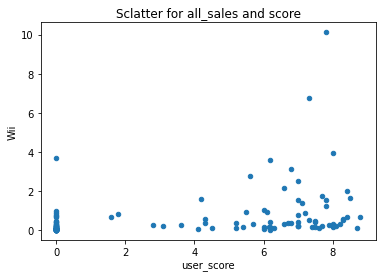

0.3260527004609067 score and sales independence


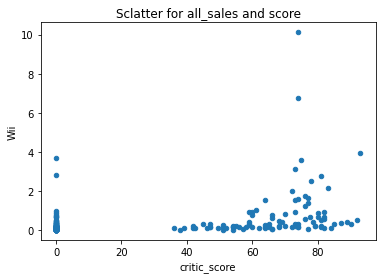

0.32618031969442185 score and sales independence


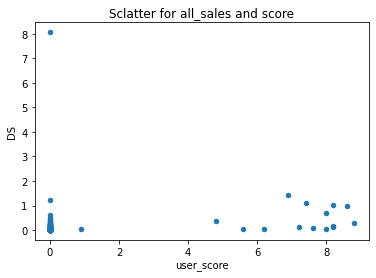

0.1218444771081575 score and sales independence


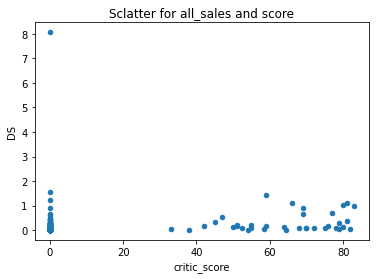

0.10836864864432788 score and sales independence


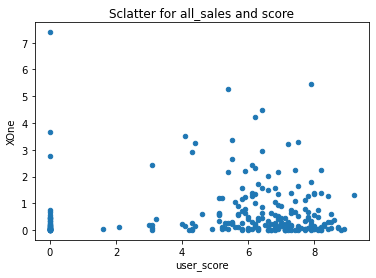

0.007967404648169927 score and sales independence


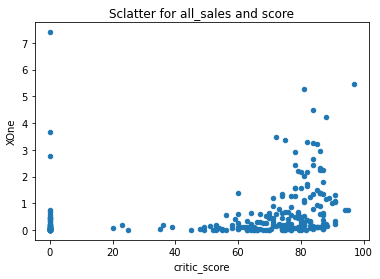

0.19966512446250992 score and sales independence


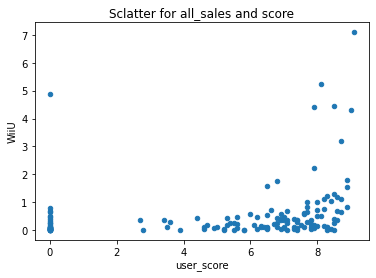

0.25107437789044185 score and sales independence


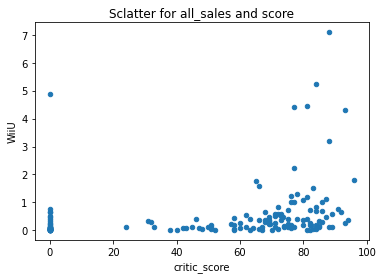

0.25212004653148984 score and sales independence


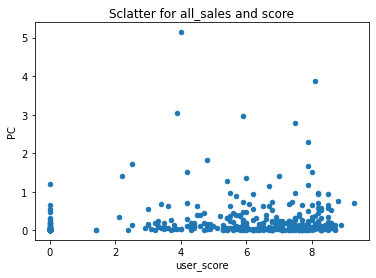

0.08775907985119118 score and sales independence


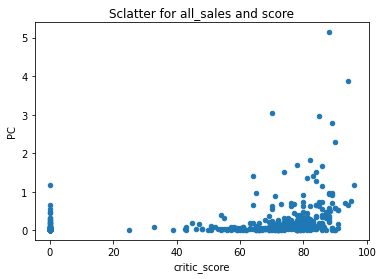

0.25558249153441015 score and sales independence


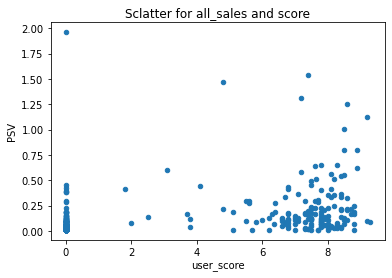

0.38128956157317756 score and sales independence


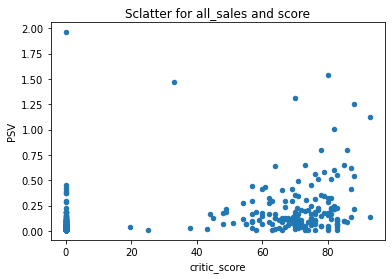

0.40460107575980864 score and sales independence


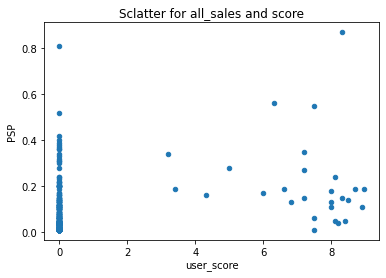

0.3187624404230657 score and sales independence


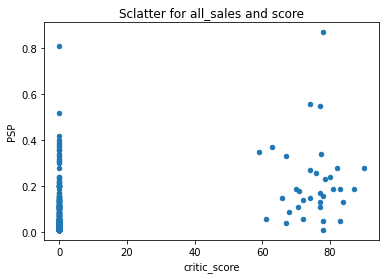

0.3754863518269206 score and sales independence


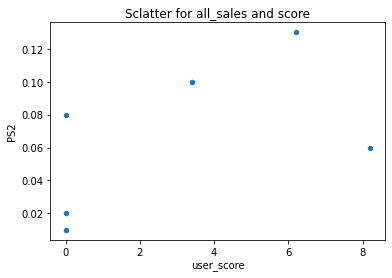

0.5427187194088864 score and sales independence


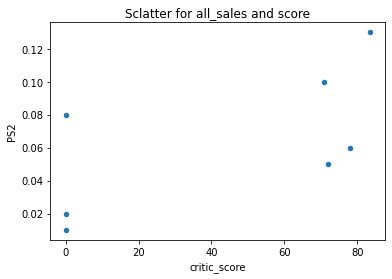

0.6347067712468438 score and sales independence


In [89]:
B=['PS3', 'X360', 'PS4', '3DS', 'Wii', 'DS', 'XOne', 'WiiU', 'PC','PSV', 'PSP', 'PS2']
for index in range(len(B)):
    for c in ['user_score','critic_score']:
        score_effect(B[index],c)

Across all distributions, it can be concluded that there is no correlation between sales and reviews across all platforms.

### Let's look at the general distribution of games by genre

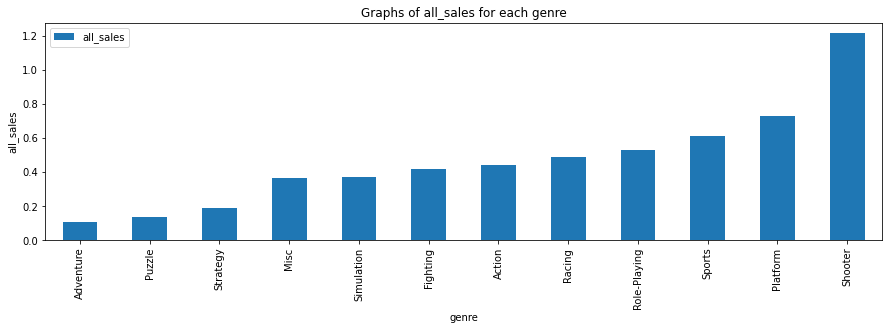

In [90]:
df_genre=df.pivot_table(index='genre', values='all_sales').sort_values(by='all_sales')
df_genre.plot(y='all_sales', kind='bar',figsize=(15, 4))
plt.title('Graphs of all_sales for each genre'),
plt.ylabel('all_sales')
plt.show()


The most popular genres are 'Shooters' and 'Platform'. The lowest sales for genres - 'Adventure', 'Strategy' and 'Puzzle'

In [91]:
df['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Racing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

## Analisis for each region

In [92]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,4,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,4,16.27
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,4,14.73
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4052 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4052 non-null   object 
 1   platform         4052 non-null   object 
 2   year_of_release  4052 non-null   float64
 3   genre            4052 non-null   object 
 4   na_sales         4052 non-null   float64
 5   eu_sales         4052 non-null   float64
 6   jp_sales         4052 non-null   float64
 7   other_sales      4052 non-null   float64
 8   critic_score     4052 non-null   float64
 9   user_score       3700 non-null   float64
 10  rating           4052 non-null   object 
 11  all_sales        4052 non-null   float64
dtypes: float64(8), object(4)
memory usage: 411.5+ KB


In [94]:
def func_region(data,region):
    df_region=data.pivot_table(index='platform', values=region).sort_values(by=region,ascending=False)
    df_rating=df.pivot_table(index='rating', values=region).sort_values(by=region)
    df_genre=df.pivot_table(index='genre', values=region).sort_values(by=region,ascending=False)
    return (df_region.plot(y=region,kind='pie',figsize=(8,8)),
            plt.title(region),
            plt.show(),
            print(df_region.head(5)),
            print(df_genre.head(5)),
            df_rating.plot(y=region, kind='bar',figsize=(10, 4)),
            plt.title('ESRB ratings for each region'))

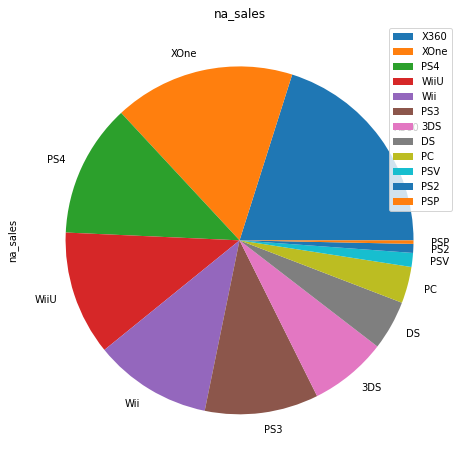

          na_sales
platform          
X360      0.450949
XOne      0.377004
PS4       0.277398
WiiU      0.259184
Wii       0.245572
          na_sales
genre             
Shooter   0.585693
Platform  0.313770
Sports    0.278718
Fighting  0.198931
Misc      0.182749


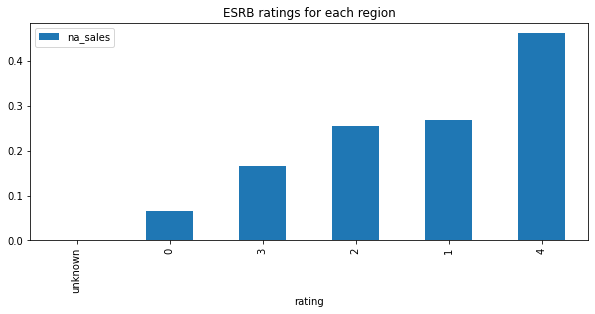

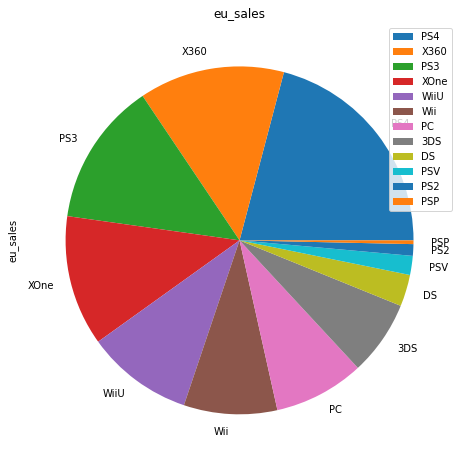

          eu_sales
platform          
PS4       0.359923
X360      0.232945
PS3       0.230224
XOne      0.208866
WiiU      0.170952
          eu_sales
genre             
Shooter   0.445934
Platform  0.246475
Sports    0.227359
Racing    0.225444
Action    0.157086


/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


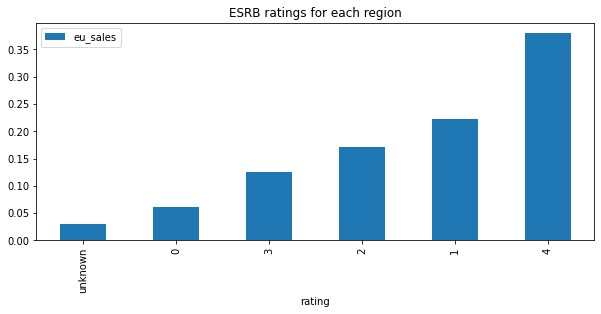

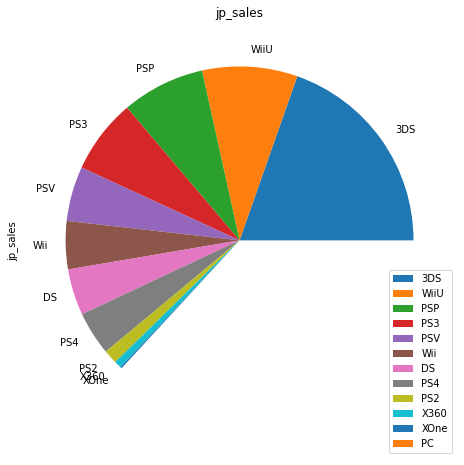

          jp_sales
platform          
3DS       0.196140
WiiU      0.088503
PSP       0.077325
PS3       0.069285
PSV       0.050909
              jp_sales
genre                 
Role-Playing  0.171763
Platform      0.099426
Simulation    0.085588
Fighting      0.077862
Action        0.049441


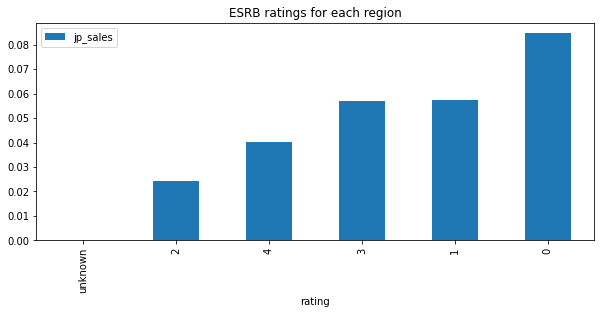

In [95]:
A=['na_sales','eu_sales','jp_sales']
for index in range(len(A)):
    func_region(df,A[index])

The American market-
According to the chart of sales in the American market, platforms are in the lead: X360, Wi, XOne, GB.
Minimum number of platform sales: PSV, PC, DC, PSP.
The rest of the platforms share sales approximately equally.
The most popular genres in the American market: Shooters, Platform, Sports.
The histogram of sales versus rating shows the biggest sales of games 17+.

The European market-
According to the chart of sales in the European market, platforms are in the lead: PS4, X360, PS3, XOne.
Minimum number of platform sales: PSP, PS2, PSV, DS.
The rest of the platforms share sales approximately equally.
The most popular genres in the European market the same as in the American: Shooters, Platform, Sports.
The histogram of sales versus rating shows the biggest sales again of games 17+.

The Japanise market-
According to the chart of sales in the Japanise market, platforms are in the lead: 3DS, WiiU, PSP.
Minimum number of platform sales: Xone, X360, PS2.
The rest of the platforms share sales approximately equally.
The most popular genre in the Japanise market: Role-Playing.
The histogram of sales versus rating shows the biggest sales of games for EVERYONE.


You can notice similar preferences of buyers in the American and European markets and completely opposite - in Japan.


## Testing hypotheses

### Average user ratings of the Xbox One and PC platforms are the same

The null hypothesis-the average user ratings of the Xbox One and PC platforms are the same. The alternative hypotheses-the average user ratings of the Xbox One and PC platforms are not equal.

In [96]:
user_ratings_XOne=df[(df['user_score'].notna())].query('platform=="XOne"')
user_ratings_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,0,7.39
165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,4,5.47
179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,4,5.26
242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,3,4.49
270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,4,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,XOne,2015.0,Action,0.00,0.01,0.00,0.00,65.0,6.0,4,0.01
16630,Sébastien Loeb Rally Evo,XOne,2016.0,Racing,0.00,0.01,0.00,0.00,63.0,8.2,1,0.01
16643,Rugby Challenge 3,XOne,2016.0,Sports,0.00,0.01,0.00,0.00,64.0,6.6,1,0.01
16645,ZombiU,XOne,2016.0,Action,0.00,0.01,0.00,0.00,77.0,7.7,4.0,0.01


In [97]:
user_ratings_PC=df[(df['user_score'].notna())].query('platform=="PC"')
user_ratings_PC

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
192,Diablo III,PC,2012.0,Role-Playing,2.44,2.16,0.0,0.54,88.0,4.0,4,5.14
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,1.16,2.12,0.0,0.60,94.0,8.1,4,3.88
458,The Sims 4,PC,2014.0,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,3,3.05
480,Star Wars: The Old Republic,PC,2011.0,Role-Playing,1.58,1.01,0.0,0.38,85.0,5.9,3,2.97
538,Battlefield 3,PC,2011.0,Shooter,0.89,1.43,0.0,0.46,89.0,7.5,4,2.78
...,...,...,...,...,...,...,...,...,...,...,...,...
16658,Driving Simulator 2011,PC,2011.0,Racing,0.00,0.01,0.0,0.00,0.0,0.0,0,0.01
16678,End of Nations,PC,2012.0,Strategy,0.01,0.00,0.0,0.00,0.0,0.0,3,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.0,0.00,80.0,7.6,4,0.01
16696,Breach,PC,2011.0,Shooter,0.01,0.00,0.0,0.00,61.0,5.8,3,0.01


In [98]:
print(user_ratings_PC['user_score'].describe())
user_ratings_XOne['user_score'].describe()

count    378.000000
mean       5.458069
std        2.775990
min        0.000000
25%        4.200000
50%        6.350000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64


count    236.000000
mean       5.565466
std        2.715496
min        0.000000
25%        5.100000
50%        6.400000
75%        7.425000
max        9.200000
Name: user_score, dtype: float64

In [99]:
print(np.var(user_ratings_PC['user_score']))#checking selections to select a method
np.var(user_ratings_XOne['user_score'])

7.685735159290054


7.342673935291584

In [100]:
alpha = 0.1
results = st.ttest_ind(user_ratings_PC['user_score'],user_ratings_XOne['user_score'],equal_var = True)
print('p-value:',results.pvalue) 
if results.pvalue<alpha: 
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    

p-value: 0.6383524553137261
We can't reject the null hypothesis


We can't reject the null hypothesis, so we can say that user ratings of the Xbox One and PC platforms equal.

### Average user ratings for the Action and Sports genres are different.

The null hypothesis-the average user ratings for the Action and Sports genres are the same. The alternative hypotheses-the average user ratings for the Action and Sports genres are not equal.

In [101]:
user_ratings_Action=df[(df['user_score'].notna())].query('genre=="Action"')
user_ratings_Action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,4,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,4,16.27
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,4,12.62
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,1,8.17
118,Uncharted 3: Drake's Deception,PS3,2011.0,Action,2.77,2.75,0.19,1.03,92.0,8.3,3,6.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16680,Kyoukai no Shirayuki,PSV,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,0.00,0.01,0.00,0.00,80.0,7.6,4,0.01
16699,The Longest 5 Minutes,PSV,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


In [102]:
user_ratings_Sports=df[(df['user_score'].notna())].query('genre=="Sports"')
user_ratings_Sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.30,1,8.58
94,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.00,1,7.60
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,0.0,0.00,0,6.64
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.30,1,6.46
143,FIFA 15,PS4,2014.0,Sports,0.80,4.33,0.05,0.90,82.0,5.70,1,6.08
...,...,...,...,...,...,...,...,...,...,...,...,...
16241,NHL 16,PS3,2015.0,Sports,0.00,0.01,0.00,0.00,79.0,5.75,2.0,0.01
16428,R.B.I. Baseball 2016,PS4,2016.0,Sports,0.01,0.00,0.00,0.00,0.0,0.00,0,0.01
16450,Turbo: Super Stunt Squad,X360,2013.0,Sports,0.00,0.01,0.00,0.00,38.0,4.50,1,0.01
16518,Rugby World Cup 2015,PC,2015.0,Sports,0.00,0.01,0.00,0.00,25.0,1.40,1,0.01


In [103]:
print(user_ratings_Sports['user_score'].describe())
user_ratings_Action['user_score'].describe()

count    341.000000
mean       4.287243
std        2.841464
min        0.000000
25%        1.400000
50%        5.300000
75%        6.700000
max        8.800000
Name: user_score, dtype: float64


count    1203.000000
mean        4.184871
std         3.489765
min         0.000000
25%         0.000000
50%         5.600000
75%         7.400000
max         9.100000
Name: user_score, dtype: float64

In [104]:
print(np.var(user_ratings_Sports['user_score']))#checking selections to select a method
np.var(user_ratings_Action['user_score'])

8.050240495007783


12.168333046574473

In [105]:
alpha = 0.1
results = st.ttest_ind(user_ratings_Sports['user_score'],user_ratings_Action['user_score'],equal_var = False)
print('p-value:',results.pvalue) 
if results.pvalue<alpha: 
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
    

p-value: 0.5778348613646287
We can't reject the null hypothesis


We can't reject the null hypothesis, so we can reject the alternative hypothesis, and say that user ratings of the Action and Sports genres equal.

## General conclusion

After analyzing the data on sales of games on different platforms, in different world markets, we can draw the following conclusions:
1) When planning a campaign for 2017. keep in mind that the average platform life is about 6.5 years, so it is better to bet on newer platforms such as PS4 and XOne. Also, these platforms have the highest average sales and sales in recent years, so they look the most attractive in the future.


2) But it must be taken into account that the Japanese market is fundamentally different from the markets of America and Europe, therefore, it is necessary to rely on various platforms, genres and ratings.


3) Feedback from users and experts does not greatly affect actual sales, and should not be relied upon in the future.